# Place field visualization for CRCNS hc-3 data

_Etienne Ackermann, 12/16/2015_

The data can be downloaded from the [CRCNS](http://crcns.org/data-sets/hc/hc-3) (Collaborative Research in Computational Neuroscience) website, and the ```hc-3``` data set in particular.

### Summary

Here I will do a very quick and rough place field visualization to see which cells show place preferences. In particular, we limit the spikes to only those where the animal was running at some minimum velocity (3 cm/s), and then we further restrict place cells to be those with some minimum maximum firing rate (2 Hz) and a maximum mean firing rate (4 Hz).


**WARNING:** We do not know what the sampling frequency is that's associated with the .whl trajectory file. We can assume that the entire experiment was logged in the .whl file, and that a uniform sampling interval was used, so that we can determine the sampling frequency by taking the number of samples in the .whl file, and dividing by the experiment duration. We should check to see that several of the .whl-experiment pairs give us the same sampling frequency...

**CONCLUSION:** It seems like the .whl files were logged at 60 Hz, which is a common sampling rate for video cameras, so at least it seems plausible.

---

## Load trajectory data from .whl file

Data loaded successfully.


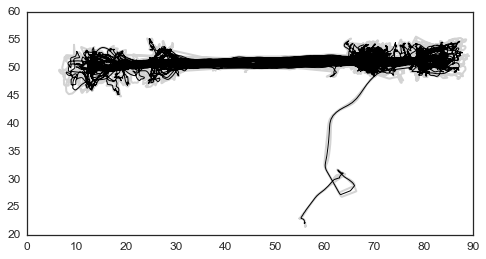

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from pandas import Series, DataFrame

%matplotlib inline

# read trajectory:
try:
    df1whl = pd.read_table( 'C://Etienne//Dropbox//neoReader//Data//gor01-6-7//2006-6-7_11-26-53_lin1//2006-6-7_11-26-53.whl',sep='\t', skiprows=0, names=['x1', 'y1', 'x2', 'y2'] )
    df2whl = pd.read_table( 'C://Etienne//Dropbox//neoReader//Data//gor01-6-7//2006-6-7_16-40-19_lin2//2006-6-7_16-40-19.whl',sep='\t', skiprows=0, names=['x1', 'y1', 'x2', 'y2'] )
except:
    print( "Cannot load files in C:/...; trying Unix location instead.")
    try:
        df1whl = pd.read_table( '/home/etienne/Dropbox/neoReader/Data/gor01-6-7/2006-6-7_11-26-53_lin1/2006-6-7_11-26-53.whl',sep='\t', skiprows=0, names=['x1', 'y1', 'x2', 'y2'] )
        df2whl = pd.read_table( '/home/etienne/Dropbox/neoReader/Data/gor01-6-7/2006-6-7_16-40-19_lin2/2006-6-7_16-40-19.whl',sep='\t', skiprows=0, names=['x1', 'y1', 'x2', 'y2'] )
    except:
        print( "Unexpected error:", sys.exc_info()[0] )
        raise
    else:
        print( "Data loaded successfully." )
else:
    print( "Data loaded successfully." )
    
# plot trajectory:
sns.set(rc={'figure.figsize': (8, 4),'lines.linewidth': 1, 'font.size': 16, 'axes.labelsize': 14, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style("white")
palette = sns.color_palette()
plt.plot( df2whl['x1'], df2whl['y1'], linewidth=2, color='lightgray');
plt.plot( df2whl['x2'], df2whl['y2'], linewidth=2, color='lightgray');
plt.plot( (df2whl['x1'] + df2whl['x2'])/2, (df2whl['y1'] + df2whl['y2'])/2, linewidth=1, color='k' );

## Visualize position along the x-axis over time, to see how many runs were performed:

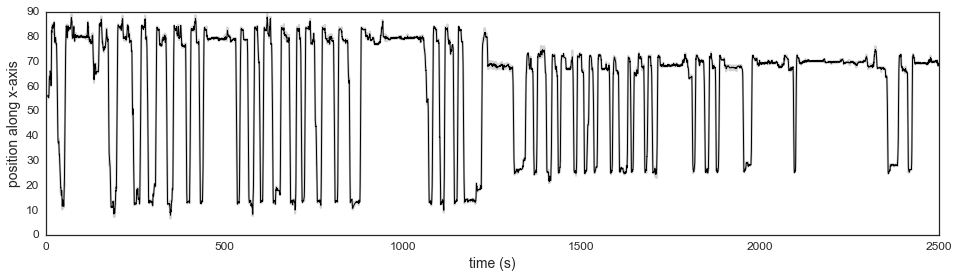

In [2]:
sns.set(rc={'figure.figsize': (16, 4),'lines.linewidth': 1.5, 'font.size': 16, 'axes.labelsize': 14, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style("white")
f, ( ax1 ) = plt.subplots(1,1)

ax1.plot(np.linspace(0,len(df2whl.index)/60,len(df2whl.index)),df2whl['x1'], linewidth=2, color='lightgray' )
ax1.plot(np.linspace(0,len(df2whl.index)/60,len(df2whl.index)),df2whl['x2'], linewidth=2, color='lightgray' )
ax1.plot(np.linspace(0,len(df2whl.index)/60,len(df2whl.index)),(df2whl['x1'] + df2whl['x2'])/2, linewidth=1, color='k' )
ax1.set_xlim([0,2500])
ax1.set_xlabel('time (s)')
ax1.set_ylabel('position along x-axis')

#saveFigure("figures/x-pos vs time.pdf")


## Estimate video sampling rate

In [ ]:
# specify session parameters
# this can either be read from the meta data, or extracted from the file structure, or in this case, hard-coded.
fs = 32552
base_filename1 = '/home/etienne/Dropbox/neoReader/Data/gor01-6-7/2006-6-7_11-26-53_lin1/2006-6-7_11-26-53'
base_filename2 = '/home/etienne/Dropbox/neoReader/Data/gor01-6-7/2006-6-7_16-40-19_lin2/2006-6-7_16-40-19'
num_electrodes = 12

for ele in np.arange(num_electrodes):
    dt1a = pd.read_table( base_filename1 + '.clu.' + str(ele + 1), skiprows=1, names='u' )
    dt1b = pd.read_table( base_filename1 + '.res.' + str(ele + 1), header=None, names='t' )
    dt2a = pd.read_table( base_filename2 + '.clu.' + str(ele + 1), skiprows=1, names='u' )
    dt2b = pd.read_table( base_filename2 + '.res.' + str(ele + 1), header=None, names='t' )
    ls1a = list(dt1a['u'])
    ls1b = list(dt1b['t'])
    ls2a = list(dt2a['u'])
    ls2b = list(dt2b['t'])
    d1 = {'clu' + str( ele + 1 ): Series(ls1a, index=ls1b)}
    d2 = {'clu' + str( ele + 1 ): Series(ls2a, index=ls2b)}
    if ele == 0:
        df1 = DataFrame(d1)
        df2 = DataFrame(d2)
    else:
        df1 = df1.append(DataFrame(d1))
        df2 = df2.append(DataFrame(d2))

        # determine experiment durations:
exp_duration1 = df1.index[-1]/fs # seconds
exp_duration2 = df2.index[-1]/fs # seconds

print("LinearOne lasted {0:2.2f} minutes, sampling at {1} Hz".format(exp_duration1/60, fs))
print("LinearTwo lasted {0:2.2f} minutes, sampling at {1} Hz".format(exp_duration2/60, fs))

print("LinearOne had {0} position estimates, so that the position sampling frequency is approx {1:2.2f} Hz".format(df1whl.index[-1],df1whl.index[-1]/exp_duration1 ))
print("LinearTwo had {0} position estimates, so that the position sampling frequency is approx {1:2.2f} Hz".format(df2whl.index[-1],df2whl.index[-1]/exp_duration2 ))

#### WARNING!! Unfortunately we could **not** get a consistent sampling rate estimate for the two video trajectory (.whl) files... and I could not find any additional information about it online... What to do?

...

I have checked a small random sampling of other experiments, and they seem to agree with the 60 Hz sampling rate, so this is what I will use.

Consequently, I do not know where the missing data are for LinearOne---at the beginning, or the end? Or spread throughout?

In estimating place fields, I will only use LinearTwo for now...

## Load spikes from LinearTwo:

In [3]:
import pickle

#with open('../../Data/st_array1rn.pickle', 'rb') as f:
#    st_array1 = pickle.load(f)
with open('../../Data/st_array2rn.pickle', 'rb') as f:
    st_array2 = pickle.load(f)

## Load Python modules and helper functions

In [4]:
import sys
sys.path.insert(0, '../')

import numpy as np
import pandas as pd
import pickle 
import seaborn as sns
#import yahmm as ym

from matplotlib import pyplot as plt
from pandas import Series, DataFrame

from efunctions import * # load my helper functions

%matplotlib inline

from scipy.signal import butter, lfilter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filtfilt(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    #y = lfilter(b, a, data)
    y = filtfilt(b, a, data, padlen=150)
    return y

def rms(x):
    return np.sqrt(np.mean(x**2))

function saveFigure(filename) loaded

Tip: to save a figure, call saveFigure("path/figure.pdf")


## Build place field map for LinearTwo using only x-coords
1. estimate instantaneous running velocity at 60 Hz
2. smooth running velocity with a zero-phase filter
3. consider only spikes corresponding to bins where the instantaneous velocity is above some threshold (3 cm/s?)
4. determine the number of spikes per position bin, and the duration spent in that bin (all on the suprathreshold data)
5. smooth place fields again? using a Gaussian kernel?

In [5]:
# speed as a function of time...

centerx = (np.array(df2whl['x1']) + np.array(df2whl['x2']))/2
centery = (np.array(df2whl['y1']) + np.array(df2whl['y2']))/2

dx = np.ediff1d(centerx,to_begin=0)
dy = np.ediff1d(centery,to_begin=0)
dvdt = np.sqrt(np.square(dx) + np.square(dy))*60 # cm per second

cutoff=1
dvdtlowpass = butter_lowpass_filtfilt(dvdt, cutoff=cutoff, fs=60, order=6)

print('The animal (gor01) ran an average of {0:2.2f} cm/s'.format(dvdt.mean()))

th = 3 #cm/s
runindex = np.where(dvdtlowpass>=th); runindex = runindex[0]
print("The animal ran faster than th = {0:2.1f} cm/s for a total of {1:2.1f} seconds (out of a total of {2:2.1f} seconds).".format(th,len(runindex)/60,len(centerx)/60))


The animal (gor01) ran an average of 2.89 cm/s
The animal ran faster than th = 3.0 cm/s for a total of 540.5 seconds (out of a total of 2587.8 seconds).


(30, 70)

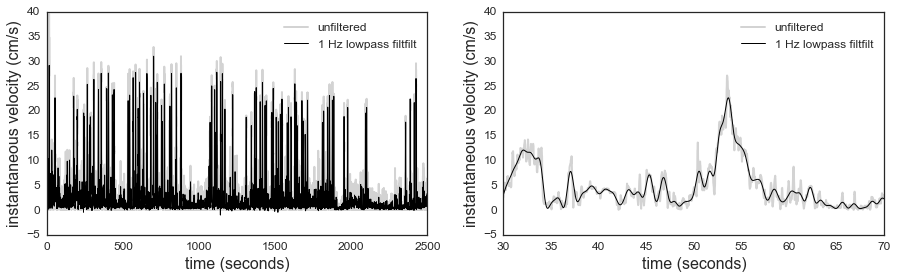

In [6]:
sns.set(rc={'figure.figsize': (15, 4),'lines.linewidth': 3, 'font.size': 18, 'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style("white")

f, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(np.arange(0,len(dvdt))/60,dvdt,alpha=1,color='lightgray',linewidth=2)
ax1.plot(np.arange(0,len(dvdt))/60,dvdtlowpass, alpha=1,color='k',linewidth=1)
ax1.set_xlabel('time (seconds)')
ax1.set_ylabel('instantaneous velocity (cm/s)')
ax1.legend(['unfiltered', str(cutoff) + ' Hz lowpass filtfilt'])
ax1.set_xlim([0,2500])

ax2.plot(np.arange(0,len(dvdt))/60,dvdt,alpha=1,color='lightgray',linewidth=2)
ax2.plot(np.arange(0,len(dvdt))/60,dvdtlowpass, alpha=1,color='k',linewidth=1)
ax2.set_xlabel('time (seconds)')
ax2.set_ylabel('instantaneous velocity (cm/s)')
ax2.legend(['unfiltered',  str(cutoff) + ' Hz lowpass filtfilt'])
ax2.set_xlim([30,70])


In [ ]:
# extract spikes only corresponding to those time bins where the animal was above threshold:
# idea: bin all spikes in bins corresponding to 60 Hz bins, and then only keep those with indices stored in itemindex

In [7]:
def list_of_spk_time_arrays_to_spk_counts_arrays(st_array_extern, ds=0, fs=0 ):
    """
    st_array: list of ndarrays containing spike times (in sample numbers!)
    ds:       delta sample number; integer value of samples per time bin
    fs:       sampling frequency
    
    argument logic: if only st_array is passed, use default ds; if ds is passed, use as is and ignore fs; if ds and fs are passed, use ds as time in seconds
    
    returns a (numBins x numCell) array with spike counts
    """
    
    st_array = st_array_extern
    
    if fs == 0:
        if ds == 0:
            ds = 1000 # assume default interval size
    else: # sampling frequency was passed, so interpret ds as time-interval, and convert accordingly:
        if ds == 0:
            ds = 1000 # assume default interval size
        else:
            ds = round(ds*fs)
            
    # determine number of units:
    num_units = len(st_array)
    
    #columns = np.arange(0,num_units)
    #df = DataFrame(columns=columns)
    
    maxtime = 0
    for uu in np.arange(num_units):
        try:
            maxtime = max(st_array[uu].max(), maxtime)
        except:
            maxtime = maxtime
    
    # create list of intervals:
    intlist = np.arange(0,maxtime,ds)
    num_bins = len(intlist)
    
    spks_bin = np.zeros((num_bins,num_units))
    
    print("binning data into {0} x {1:2.1f} ms temporal bins...".format(num_bins, ds*1000/fs))
    
    for uu in np.arange(num_units):
        # count number of spikes in an interval:
        spks_bin[:,uu] = np.histogram(st_array[uu], bins=num_bins, density=False, range=(0,maxtime))[0]
        #spk_count_list.append([x&y for (x,y) in zip(st_array[uu]>ii, st_array[uu] < ii+ds)].count(True))
        #st_array[uu] = st_array[uu][st_array[uu]>ii+ds]        
        #if df.empty:
        #    df = DataFrame([spk_count_list], columns=columns)
        #else:
        #    df = df.append(DataFrame([spk_count_list], columns=columns),ignore_index=True)
                    
    return spks_bin

spk_counts2 = list_of_spk_time_arrays_to_spk_counts_arrays(st_array2, ds=0.016666667, fs=32552)


binning data into 155135 x 16.7 ms temporal bins...


In [8]:
# get bins of spk counts that correspond to where the animal was running above threshold:
run_spks_bin = spk_counts2[runindex,:]

num_bins = 200 # position bins for place fields
x0 = 0
xl = 100

num_units = len(st_array2)

data = np.array(df2whl['x1'][runindex].tolist())
bins = np.linspace(x0,xl,num_bins)
digitized = np.digitize(data, bins) # bin numbers
bin_cnt = [len(data[digitized == i]) for i in range(1, len(bins))]
bin_time = [b/60 for b in bin_cnt] # convert to seconds spent in bin

pf2spk_cnt = np.zeros((num_bins,num_units))
closest_bins = np.digitize(data,bins)
for cnt, bb in enumerate(closest_bins):
    pf2spk_cnt[bb,:] += run_spks_bin[cnt,:]
    
pf2 = []
pfsmooth = []
minth = 0.05 # min threshold for backgrnd spking actvy
for uu in np.arange(0,num_units):
    pf2.append([b/max(c,1) for (b,c) in zip(pf2spk_cnt[:,uu],bin_time)])
    pfsmooth.append(butter_lowpass_filtfilt(pf2[uu], cutoff=15, fs=200, order=4))

pfsmooth = np.array(pfsmooth)
pfsmooth[pfsmooth<minth] = minth

In [9]:
# throw away cells that look like interneurons, or cells that are inactive throughout the entire experiment:
meanfiringrates = pfsmooth.mean(axis=1)
maxfiringrates = pfsmooth.max(axis=1)

max_meanfiringrate = 4 # Hz
min_maxfiringrate = 2 # Hz

pindex = np.where((meanfiringrates<=max_meanfiringrate) & (maxfiringrates>min_maxfiringrate)); pindex = pindex[0]
print("{0} out of {1} cells passed the criteria to be place cells...".format(len(pindex),len(meanfiringrates)))

# order remaining cells by peak hight along the track
peaklocations = pfsmooth.argmax(axis=1)
peakorder = peaklocations[pindex].argsort()

# visualize place fields

21 out of 90 cells passed the criteria to be place cells...


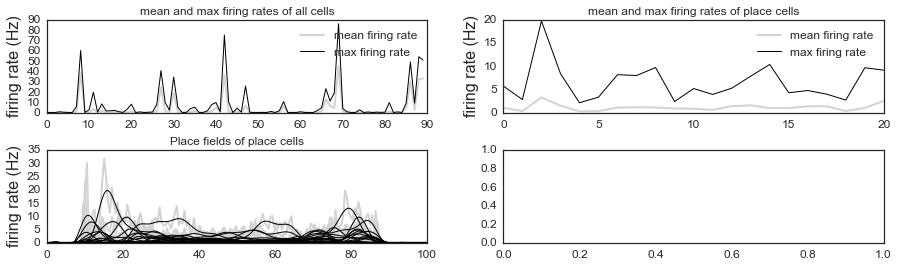

In [10]:
sns.set(rc={'figure.figsize': (15, 4),'lines.linewidth': 3, 'font.size': 18, 'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style("white")

f, ( (ax1, ax2), (ax3, ax4) ) = plt.subplots(2,2)
ax1.plot(meanfiringrates,linewidth=2,color='lightgray')
ax1.plot(maxfiringrates,linewidth=1,color='k')
ax1.legend(['mean firing rate','max firing rate'])
ax1.set_title('mean and max firing rates of all cells')

ax2.plot(meanfiringrates[pindex],linewidth=2,color='lightgray')
ax2.plot(maxfiringrates[pindex],linewidth=1,color='k')
ax2.legend(['mean firing rate','max firing rate'])
ax2.set_title('mean and max firing rates of place cells')

cell_list = [3,7,11,13,14,27,45]
#cell_list = [3,37,68]
#cell_list = [11]
cell_list = pindex

for uu in cell_list:
    ax3.plot(bins[1:], pf2[uu], linewidth=2, color='lightgray')

for uu in cell_list:
    ax3.plot(bins[1:], pfsmooth[uu], linewidth=1, color='k')

plt.subplots_adjust(hspace=0.40)
#ax3.set_title("place fields in LinearTwo",fontsize=14)
ax1.set_ylabel("firing rate (Hz)")
ax2.set_ylabel("firing rate (Hz)")
ax3.set_ylabel("firing rate (Hz)")
ax3.set_xlim([0,100])
ax3.set_title('Place fields of place cells')

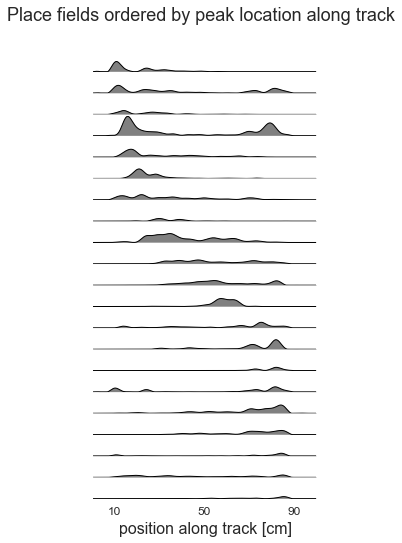

In [11]:
sns.set(rc={'figure.figsize': (4,8),'lines.linewidth': 3, 'font.size': 18, 'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style("white")

f, axes = plt.subplots(len(pindex), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.100)

for ii,pp in enumerate(pindex[peakorder]):
    axes[ii].plot(bins[1:], pfsmooth[pp],linewidth=1,color='k')
    axes[ii].fill_between(bins[1:], 0, pfsmooth[pp], color='gray')
    axes[ii].set_xticks([])
    axes[ii].set_yticks([])
    axes[ii].spines['top'].set_visible(False)
    axes[ii].spines['right'].set_visible(False)
    axes[ii].spines['bottom'].set_visible(False)
    axes[ii].spines['left'].set_visible(False)
    
axes[-1].set_xticks([10,50,90])
axes[-1].set_xlabel('position along track [cm]')
f.suptitle('Place fields ordered by peak location along track')

## Now decode position to see how well we can do
1. using BVR sequences, which is 'cheating', because we used those sequences to learn the place fields
2. using SWR sequences, which is cool, but for which we don't know the ground truth...

### NOTE: we will re-bin observations in 5 ms bins, so that we can do the 20 ms decoding in 5 ms increments
### NOTE: "[SfN] 4 - Place cell overlap" is kind of messy, but finally included the rest-removed BVR creation. I might do a complete overhaul of that though...

"Place fields. Position was linearized and binned into 2.5 cm bins. Directional
place fields were calculated as the number of spikes fired in a particular position
bin and running direction divided by the time spent in that bin, smoothed with a
Gaussian kernel with a s.d. of 5 cm, and identified when the peak firing rate of the
pyramidal cell along the position bins was no less than 1 Hz. The place field size
was defined as the total area of position bins where the firing rates were no less
than 1 Hz." -- Silva, D., Feng, T., & Foster, D. J. (2015). Trajectory events across hippocampal place cells require previous experience. Nature neuroscience, 18(12), 1772-1779.

In [45]:
tau = 0.02   # sec (decoding time window)
tbin = 0.005 # sec (decoding time step/resolution)
bins_per_window = round(tau/tbin)

spk_counts2_supersampled = list_of_spk_time_arrays_to_spk_counts_arrays(st_array2, ds=tbin, fs=32552)


binning data into 516799 x 5.0 ms temporal bins...


In [52]:
# need to resample running velocity, or come up with a better alternative?
time_axis = np.arange(0,len(dvdt))/60 # in  seconds
running_vel_supersampled = np.interp(np.arange(0,len(spk_counts2_supersampled))*tbin,time_axis,dvdtlowpass)
truepos_supersampled = np.interp(np.arange(0,len(spk_counts2_supersampled))*tbin,time_axis,centerx)

print('The animal (gor01) ran an average of {0:2.2f} cm/s'.format(running_vel_supersampled.mean()))

th = 3 #cm/s
runindex_supersampled = np.where(running_vel_supersampled>=th); runindex_supersampled = runindex_supersampled[0]
print("The animal ran faster than th = {0:2.1f} cm/s for a total of {1:2.1f} seconds (out of a total of {2:2.1f} seconds).".format(th,len(runindex_supersampled)*tbin,len(centerx)/60))


The animal (gor01) ran an average of 2.90 cm/s
The animal ran faster than th = 3.0 cm/s for a total of 540.5 seconds (out of a total of 2587.8 seconds).


In [53]:
spk_counts2_supersampled_run = spk_counts2_supersampled[runindex_supersampled]
truepos_supersampled_run = truepos_supersampled[runindex_supersampled]

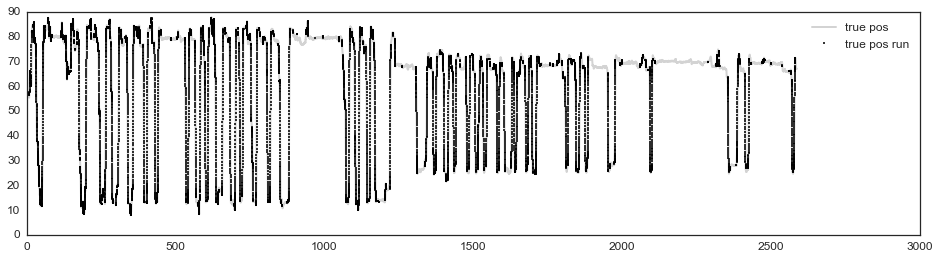

In [39]:
sns.set(rc={'figure.figsize': (16,4),'lines.linewidth': 3, 'font.size': 18, 'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style("white")
plt.plot(np.arange(0,len(spk_counts2_supersampled))*tbin,truepos_supersampled, linewidth=2, color='lightgray' )
plt.plot(runindex_supersampled*tbin,truepos_supersampled_run,marker='o', linestyle='None', markersize=2, color='k')
plt.legend(['true pos', 'true pos run'])

Here we assume all positions are equally likely, and we use

$$P(\mathbf{x}|\mathbf{n}) = c(\tau,\mathbf{n}) P(\mathbf{x}) \left( \prod_{i=1}^C f_i(\mathbf{x})^{n_i} \right) \exp \left(-\tau \sum_{i=1}^C f_i(\mathbf{x}) \right) $$

to find the distribution at each time point. In particular, we take $\tau=20$ ms, and we advance our decoding window in 5 ms steps.

In [54]:
# problem with approach!!! Discontinuities exist in run segments, so that smoothing can average temporally discontinuous segments!

# solution: first get code working on ALL data (not just run data). However, SWR events can still throw off estimates...

x = bins # spatial bins **could resample smoothed place fields onto new spatial grid as well, if we want to make it more flexible

#n  C x 1        changes every time step
#fi C x 1        never changes
#f  C x nbins    never changes

trange=1
P = np.zeros((num_bins-1,trange))
dec_errors = []
f = pfsmooth[pindex,:]
dec_pos = np.zeros((len(runindex_supersampled),1))
for tt in np.arange(0,len(runindex_supersampled)-bins_per_window): #len(spk_counts2_5ms_run)-4):
    #tt+=1 # time index
    n = spk_counts2_supersampled_run[tt:tt+bins_per_window,pindex].sum(axis=0)

    nn = np.tile(n,(num_bins-1,1)).T
    if nn.max() == 0:
#        print('No spikes in window, so cannot decode position!')
        P = P
    else:
        P = np.exp((np.log((f)**(nn))).sum(axis=0) - tau*f.sum(axis=0))
        P = P/P.sum() # normaization not strictly necessary
        est_pos = P.argmax()

        #print("estimated position: {0:2.1f} cm; actual position: {1:2.1f} cm".format(bins[est_pos],truepos_5ms_run[tt]))
        #print("decoding error: {0:2.1f} cm". format(np.abs(bins[est_pos] -truepos_5ms_run[tt])))
        dec_errors.append(np.abs(bins[est_pos] -truepos_supersampled_run[tt+round(bins_per_window/2)]))
        
    dec_pos[tt] = bins[P.argmax()]
    
print("average decoding error: {0:2.1f} cm".format(np.array(dec_errors).mean()))

average decoding error: 21.4 cm


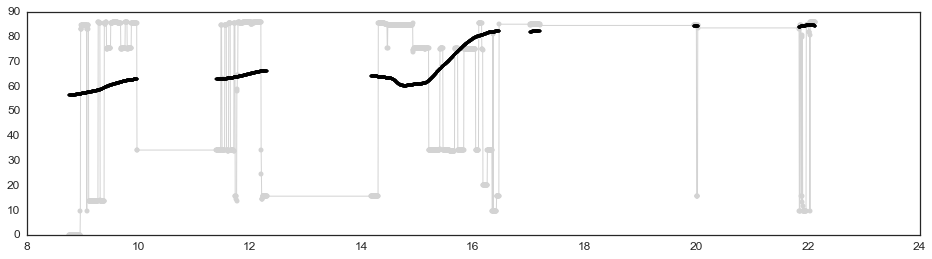

In [55]:
sns.set(rc={'figure.figsize': (16,4),'lines.linewidth': 3, 'font.size': 18, 'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style("white")
plt.plot(runindex_supersampled[0:1000]*tbin,dec_pos[0:1000],color='lightgray', marker='o', markersize=5,linewidth=1)
plt.plot(runindex_supersampled[0:1000]*tbin,truepos_supersampled_run[0:1000],linewidth=1,color='k', marker='o', markersize=3,linestyle='None')

In [ ]:
dec_pos[5:6]

In [ ]:
#tt=4000
tt=220
tt+=1
n = spk_counts2_5ms_run[tt:tt+4,pindex].sum(axis=0)

nn = np.tile(n,(num_bins-1,1)).T
if nn.max() == 0:
    print('No spikes in window, so cannot decode position!')
    P = P
else:
    P = np.exp((np.log((f)**nn)).sum(axis=0) - tau*f.sum(axis=0))
    P = P/P.sum() # normaization not strictly necessary
    est_pos = P.argmax()

    print("estimated position: {0:2.1f} cm; actual position: {1:2.1f} cm".format(bins[est_pos],truepos_5ms_run[tt]))
    print("decoding error: {0:2.1f} cm". format(np.abs(bins[est_pos] -truepos_5ms_run[tt])))
    dec_errors.append(np.abs(bins[est_pos] -truepos_5ms_run[tt]))

dec_pos[tt] = bins[P.argmax()]

plt.plot(bins[0:-1],P)

In [ ]:
n[peakorder]

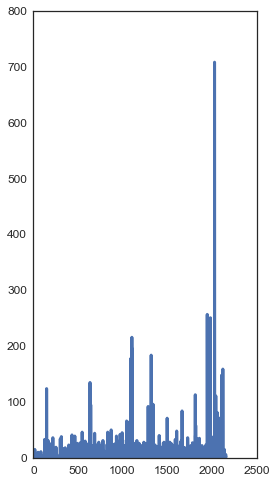

In [21]:
plt.plot(np.diff(runindex_supersampled))

In [47]:
nums = runindex_supersampled
run_ends = np.where(np.diff(nums)-1)[0] + 1
sseq_lengths = np.diff(np.hstack((0, run_ends, nums.size)))
np.diff(np.hstack((0, run_ends, nums.size))).max()

1505

In [41]:
run_ends

array([   24,    43,    89,    92,    93,   104,   134,   148,   173,
         182,   269,   287,   356,   388,   409,   428,   578,   592,
         618,   631,   638,   656,   676,   687,   704,   719,   732,
         740,   781,   796,   809,   823,   844,   885,   908,   931,
         948,   963,  1024,  1087,  1094,  1098,  1108,  1135,  1152,
        1215,  1221,  1266,  1276,  1293,  1340,  1363,  1380,  1406,
        1422,  1512,  1521,  1530,  1537,  1564,  1577,  1587,  1600,
        1608,  1624,  1634,  1645,  1662,  1702,  1785,  1791,  1824,
        1842,  1868,  1873,  1975,  1981,  1989,  1998,  2003,  2026,
        2161,  2177,  2191,  2195,  2283,  2315,  2319,  2327,  2352,
        2450,  2470,  2485,  2501,  2514,  2535,  2617,  2630,  2646,
        2661,  2677,  2678,  2695,  2704,  2705,  2728,  2807,  2895,
        2903,  2914,  2925,  2960,  3050,  3155,  3169,  3182,  3187,
        3197,  3208,  3300,  3416,  3429,  3518,  3533,  3548,  3579,
        3657,  3720,

In [48]:
sseq_lengths[sseq_lengths<bins_per_window]

array([], dtype=int64)

In [51]:
len(runindex_supersampled)

108108